# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 7월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do
* 이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
* 이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다. 
    * https://dataitgirls2.github.io/10minutes2pandas/
* 데이터 다운로드 : https://goo.gl/oJydAv 

## !중요
### 버전과 한글폰트
* 한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting

In [ ]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install pandas
# !pip install folium==0.5.0
# !pip install statsmodels -U
# 시각화 도구 설치
# !pip install missingno

# 아나콘다 사용시 
* Plotnine 설치 : https://anaconda.org/conda-forge/plotnine
* missingno 설치 : https://anaconda.org/conda-forge/missingno

In [1]:
!pip show plotnine

Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /opt/conda/lib/python3.7/site-packages
Requires: mizani, pandas, numpy, statsmodels, matplotlib, descartes, patsy, scipy
Required-by: 


In [2]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /opt/conda/lib/python3.7/site-packages
Requires: seaborn, numpy, matplotlib, scipy
Required-by: 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [5]:
# plotnine 이 import 되지 않는다면 아래 코드의 주석을 풀고 설치해 주세요.
# !pip install statsmodels -U
from plotnine import *

%을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다.
경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [24]:
# 현재 위치정보를 봅니다.
%pwd

'/home/vscode/notebooks/eda/공공데이터분석_오늘코딩'

In [25]:
# 저는 data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 
# 해당 파일을 확인해 봅니다.
%ls data/

shop_201806_01.csv*
전국_평균_분양가격_2018.6월_.csv*
전국_평균_분양가격_2018.7월_.csv*
지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv*


In [9]:
pre_sale = pd.read_csv('data/전국_평균_분양가격_2018.6월_.csv', 
                       encoding='euc-kr', engine='python')
pre_sale.shape

(2805, 5)

In [ ]:
# pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', 
#                        encoding='euc-kr', engine='python')
# pre_sale.shape

In [11]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [12]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [13]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [14]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [15]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
dtype: int64

In [16]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 

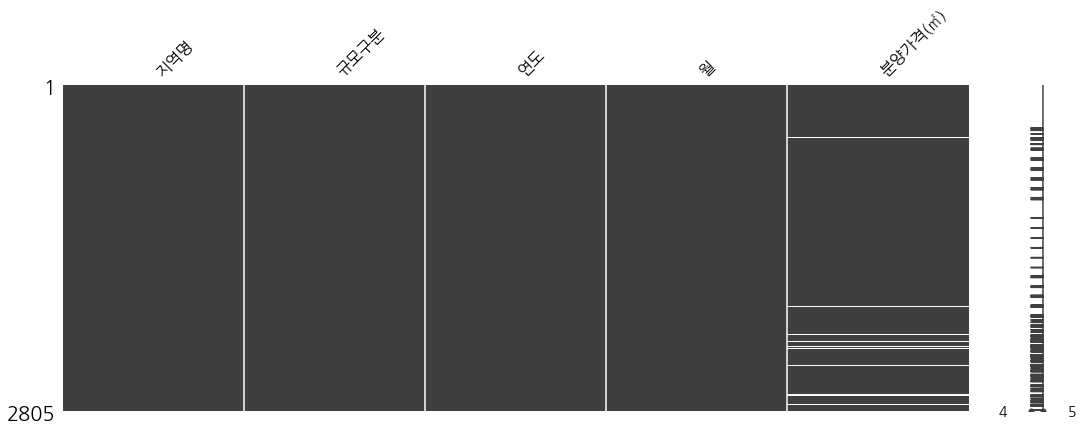

In [17]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [18]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [ ]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

In [20]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [21]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [22]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [23]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [26]:
pre_sale.describe()

,분양가격,평당분양가격
count,2582.000000,2582.000000
mean,3056.522851,10086.525407
std,1110.111932,3663.369377
min,1868.000000,6164.400000
25%,2339.000000,7718.700000
50%,2738.500000,9037.050000
75%,3289.000000,10853.700000
max,8098.000000,26723.400000


In [ ]:
# pre_sale.describe?

In [27]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2805,2805,2805,2805,2674
unique,17,5,4,12,1278
top,인천,전용면적 85㎡초과 102㎡이하,2016,11,2221
freq,165,561,1020,255,17


In [28]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017.shape

(1020, 7)

In [29]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    561
전용면적 102㎡초과          561
전용면적 60㎡이하           561
전체                   561
전용면적 60㎡초과 85㎡이하     561
Name: 규모구분, dtype: int64

In [30]:
pre_sale['지역명'].value_counts()

인천    165
대전    165
서울    165
세종    165
울산    165
제주    165
전남    165
경북    165
경남    165
충남    165
대구    165
충북    165
전북    165
강원    165
광주    165
경기    165
부산    165
Name: 지역명, dtype: int64

# 전국평균 분양가격
* groupby 와 pivot_table 활용하기

In [ ]:
# ?를 통해 도움말 보기
pre_sale.groupby?

In [33]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    456
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,199
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,470
       50%    2,516  2,672  2,849  2,912
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    456
       mean   9,203  9,683 10,360 10,888
       std    3,224  3,536  3,655  3,958
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,153
       50%    8,303  8,818  9,402  9,611
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

## 규모별 전국 평균 분양가격

In [ ]:
# ?로 도움말 보기
pre_sale.pivot_table?

In [35]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [36]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table(
    '평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [37]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']
                     ).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print(f'2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {max_delta_price:,.0f}원이다.')
print(f'상승액이 가장 작은 지역은 울산이며 평당 {min_delta_price:,.0f}원이다.')
print(f'하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print(f'전국 평균 변동액은 평당 {mean_delta_price:,.0f}원이다.')

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 387,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,666,647원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,643",482
1,경기,"10,377","11,220","11,850","12,854",2476
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,262",1090
4,광주,"8,052","8,899","9,464","9,630",1577
5,대구,"9,232","10,310","11,456","11,652",2419
6,대전,"8,098","8,502","9,045","9,589",1490
7,부산,"10,307","10,430","11,578","12,710",2402
8,서울,"19,725","20,663","21,376","22,299",2574
9,세종,"8,750","8,860","9,135","10,382",1631


* 지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약해 봤습니다.
* Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약해 보기도 했습니다.

# 시각화
* 앤스콤의 4인방 영상 : https://www.youtube.com/watch?v=3KqdNNJ-20Y
* 데이터를 시각화 해보기에 앞서 앤스콤의 4인방을 보겠습니다.
* 아래 4개의 그래프는 다른 데이터로 그려졌습니다.
* 또 이 4개의 데이터는 평균, 표준편차, 상관계수가 같습니다. 하지만 시각화 했을 때 전혀 다른 데이터임을 확인할 수 있습니다.
* 이 앤스콤의 4인방은 요약된 데이터만으로 데이터를 판단할 수 없다는 것을 보여줍니다.
* 데이터 시각화의 중요성을 얘기할 때 자주 등장하는 예시입니다.
* [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
* [The Datasaurus Dozen - Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/990px-Anscombe%27s_quartet_3.svg.png)

## 이럴 때 이런 시각화
* [분류:통계 차트와 다이어그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B6%84%EB%A5%98:%ED%86%B5%EA%B3%84_%EC%B0%A8%ED%8A%B8%EC%99%80_%EB%8B%A4%EC%9D%B4%EC%96%B4%EA%B7%B8%EB%9E%A8)


## Pandas 로 시각화 하기
* 공식 문서 : [Visualization — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## Seaborn 으로 시각화 하기
* 공식 문서:[seaborn: statistical data visualization — seaborn 0.9.0 documentation](https://seaborn.pydata.org/)

## 연도별 변동 그래프

* 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
* 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요합니다.
* 한글폰트를 지정해 주지 않는다면 글자가 두부모양으로 깨져보이게 됩니다.

In [ ]:
# (ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
#  + geom_bar(stat='identity', position='dodge')
#  + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
#  + theme(text=element_text(family='NanumBarunGothic'),
#          figure_size=(8, 4))
# )

In [38]:
import seaborn as sns
# 아래의 코드로 스타일을 지정해 주면 폰트 설정이 초기화 됩니다. 
# 따라서, 폰트설정은 스타일 지정 이후에 해주셔야 합니다.
sns.set_style("whitegrid")

In [39]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 

### 막대그래프
* 막대 그래프(-graph), 바 차트(bar chart), 바 그래프(bar graph)는 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프를 말한다. 막대는 수직으로나 수평으로 그릴 수 있다. 수직 막대 그래프는 선 그래프 또는 라인 그래프(line graph)라고도 한다.
* 출처 : [막대 그래프 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A7%89%EB%8C%80_%EA%B7%B8%EB%9E%98%ED%94%84)

## seaborn 으로 막대그래프 그리기

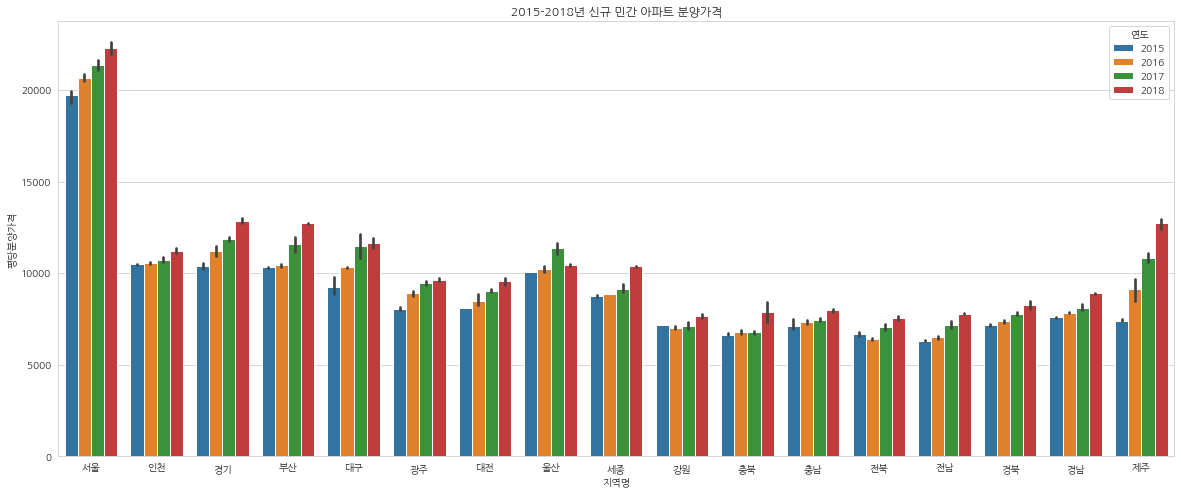

In [40]:
import seaborn as sns
sns.set_style("whitegrid")
plt.rc('font', family='NanumGothic') 
# 내부적으로 계산을 해서 그리기 때문에 속도가 좀 느립니다.
# 하지만, seaborn 으로 시각화를 할 때는 내부적으로 계산을 해주기 때문에 
# 따로 데이터를 aggregation 해주지 않아도 되는 장점이 있습니다.
# seaborn 으로 시각화 했는지 여부는 그래프를 그리는 코드 앞부분에 sns 라는 별칭이 있는지 확인해 보시면 됩니다.
plt.figure(figsize=(20, 8))
plt.title('2015-2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', 
            hue='연도')

## 판다스로 막대그래프 그리기

In [41]:
# pandas 로 시각화 하기위해 적합한 형태로 데이터를 변형합니다.
# 지역별로 bar plot을 그리고 지역별 bar를 연도별로 그립니다.
df_year_region = pd.pivot_table(region_year_all, 
                                index=['지역명'], columns='연도', 
                                values='평당분양가격')
df_year_region.sample(3)

연도,2015,2016,2017,2018
지역명,,,,
대구,"9,232","10,310","11,456","11,652"
경기,"10,377","11,220","11,850","12,854"
광주,"8,052","8,899","9,464","9,630"


In [42]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

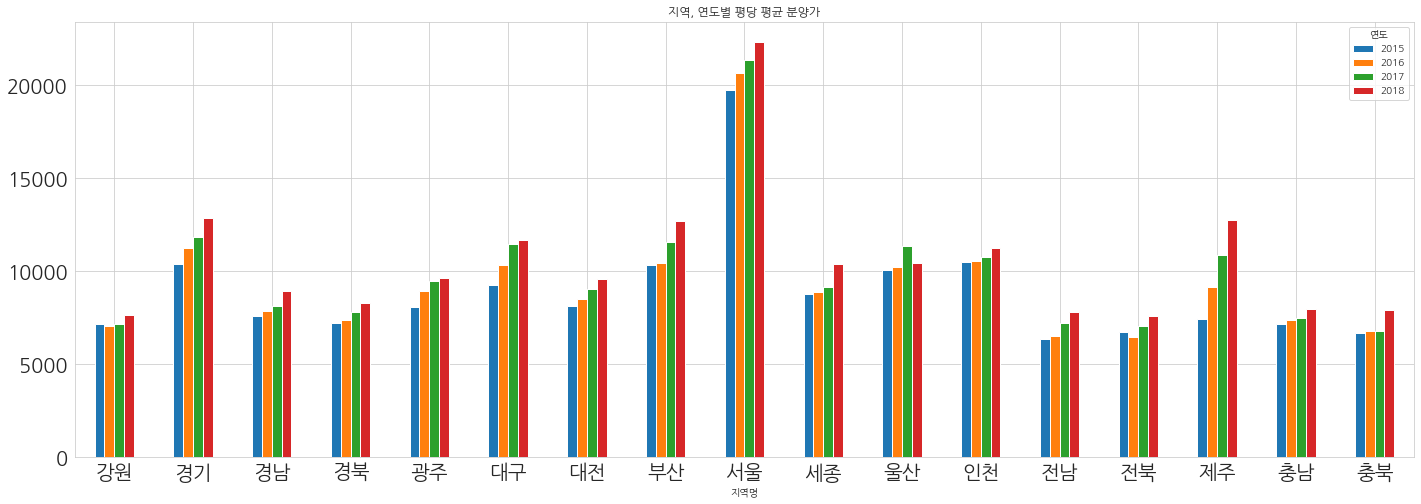

In [43]:
df_year_region.plot.bar(figsize=(24, 8), 
                        grid=True, fontsize=20, rot=0, 
                        title='지역, 연도별 평당 평균 분양가')

## 규모별 
* seaborn의 barplot은 기본값을 평균으로 구합니다.
* 각각의 막대 그래프 상단에 있는 검은색 선은 신뢰구간을 의미합니다.
* 통계학에서 신뢰 구간(信賴區間, 영어: confidence interval)은 모수가 어느 범위 안에 있는지를 확률적으로 보여주는 방법이다. 
* 신뢰구간 정의 출처 : [신뢰 구간 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8B%A0%EB%A2%B0_%EA%B5%AC%EA%B0%84)
* seaborn의 barplot의 옵션 중 ci가 이 신뢰 구간을 의미하며 기본값은 95입니다.
* 표본의 95%의 데이터가 검은색 선 안에 위치하고 있음을 알 수 있습니다.
* 나머지 5%의 데이터는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있습니다.
* 따라서 이 검은색 선을 벗어나는 데이터는 이상치(outlier)로 볼 수도 있습니다.

In [ ]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
# (ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
#  + geom_bar(stat='identity', position='dodge')
#  + ggtitle('규모별 신규 민간 아파트 분양가격')
#  + theme(text=element_text(family='NanumBarunGothic'),
#          figure_size=(8, 4))
# )

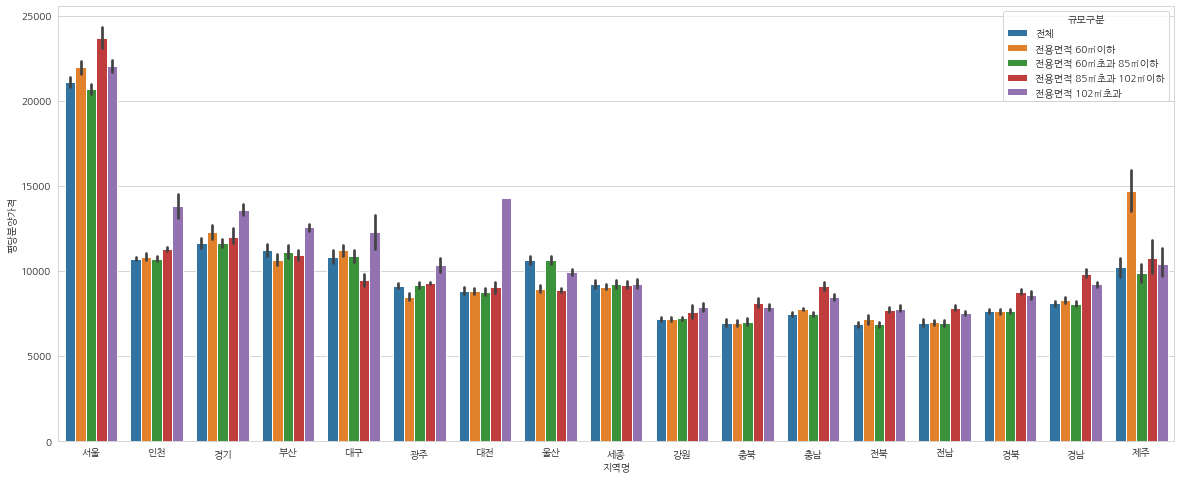

In [45]:
# seaborn 을 사용하면 위 코드보다 훨씬 간결하게 코드를 구현할 수 있습니다.
# seaborn 으로 지역, 규모별 평당 평균 분양가격
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

## 지역별 평당 분양가격 합계
* 아래 데이터로 규모(제곱미터)에 따른 평당 분양가격을 봅니다.

In [46]:
pre_sale_size =  pre_sale.pivot_table(values='평당분양가격', 
                                      index='지역명', columns='규모구분')
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
인천,"13,836","10,853","10,719","11,286","10,727"
부산,"12,584","10,656","11,135","10,971","11,241"
울산,"9,974","8,965","10,651","8,861","10,628"


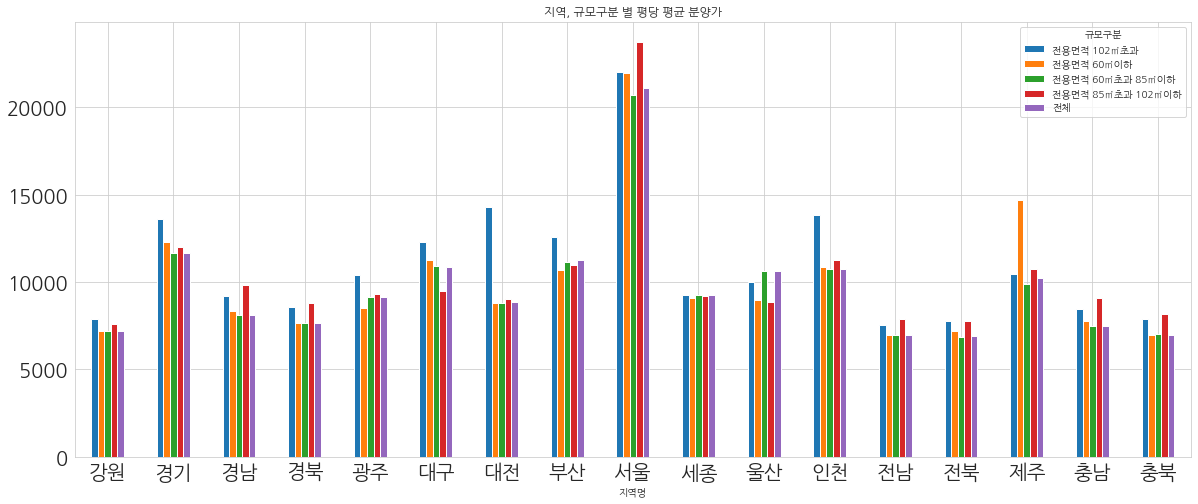

In [47]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가',
                       figsize=(20, 8), grid=True, fontsize=20, rot=0)

In [48]:
pre_sale[(pre_sale["지역명"] == "대전") & (pre_sale["규모구분"] == "전용면적 102㎡초과")]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,nan,nan
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
204,대전,전용면적 102㎡초과,2015,12,,nan,nan
289,대전,전용면적 102㎡초과,2016,1,,nan,nan
374,대전,전용면적 102㎡초과,2016,2,NaN,nan,nan
459,대전,전용면적 102㎡초과,2016,3,NaN,nan,nan
544,대전,전용면적 102㎡초과,2016,4,NaN,nan,nan
629,대전,전용면적 102㎡초과,2016,5,NaN,nan,nan
714,대전,전용면적 102㎡초과,2016,6,NaN,nan,nan
799,대전,전용면적 102㎡초과,2016,7,NaN,nan,nan


In [ ]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
# (ggplot(pre_sale)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_bar(stat='identity', position='dodge')
#  + facet_wrap('지역명')
#  + theme(text=element_text(family='NanumBarunGothic'),
#          axis_text_x=element_text(rotation=70),
#          figure_size=(12, 12))
# )

In [49]:
pre_sale_size_t = pre_sale_size.T
pre_sale_size_t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,871","13,601","9,222","8,586","10,381","12,303","14,282","12,584","22,035","9,259","9,974","13,836","7,550","7,793","10,435","8,477","7,900"
전용면적 60㎡이하,"7,185","12,300","8,320","7,646","8,494","11,254","8,816","10,656","21,976","9,071","8,965","10,853","6,980","7,184","14,700","7,772","6,951"
전용면적 60㎡초과 85㎡이하,"7,216","11,650","8,088","7,657","9,159","10,889","8,779","11,135","20,718","9,237","10,651","10,719","6,943","6,868","9,908","7,484","7,019"
전용면적 85㎡초과 102㎡이하,"7,612","12,029","9,834","8,776","9,296","9,497","9,037","10,971","23,714","9,210","8,861","11,286","7,858","7,739","10,744","9,102","8,145"
전체,"7,183","11,664","8,113","7,661","9,151","10,854","8,854","11,241","21,127","9,230","10,628","10,727","6,958","6,877","10,230","7,474","6,966"


## 전국 규모(면적)별 신규 민간 아파트 분양가격

In [50]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
229,충남,전용면적 102㎡초과,2015,12,2444,"2,444","8,065"


In [51]:
pre_sale[["지역명", "평당분양가격", "규모구분"]].sample(3)

,지역명,평당분양가격,규모구분
2425,강원,"7,666",전체
1721,대구,"11,732",전용면적 60㎡이하
1705,인천,"10,976",전체


In [52]:
pre_sale.shape

(2805, 7)

In [53]:
# 결측치를 확인합니다.
pre_sale['평당분양가격'].isnull().sum()

223

In [54]:
# 결측치가 있으면 제대로 된 시각화를 할 수 없기 때문에 drop합니다.
pre_sale['평당분양가격'].dropna(inplace=True, axis=0)

In [55]:
# 결측치가 없습니다.
pre_sale['평당분양가격'].isnull().sum()

0

In [56]:
pre_sale.shape

(2805, 7)

In [57]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [58]:
# 수치형 데이터로 변경합니다.
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [59]:
pre_sale[pre_sale['평당분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [60]:
pre_sale['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [61]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
세종,"9,259","9,071","9,237","9,210","9,230"
충북,"7,900","6,951","7,019","8,145","6,966"
대구,"12,303","11,254","10,889","9,497","10,854"


## box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

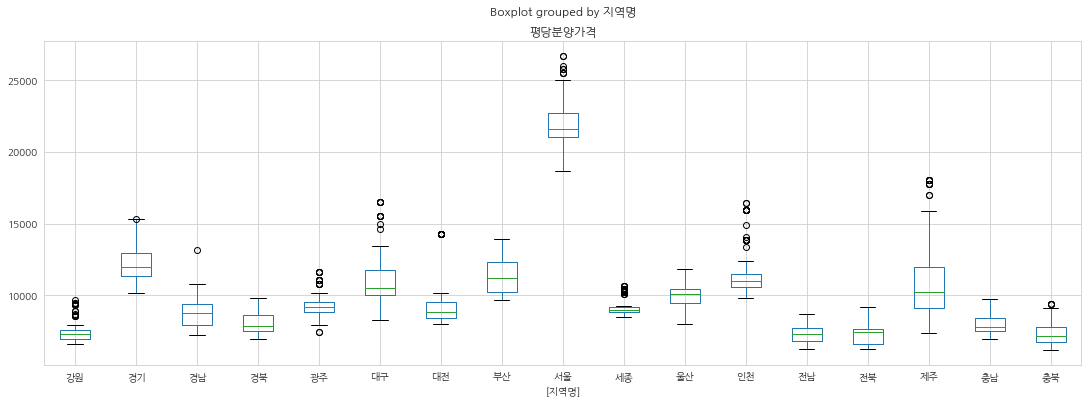

In [62]:
# 아래 그래프를 통해 지역마다 0 값이 존재하는 것으로 결측치가 있음을 확인할 수 있습니다.
pre_sale[['지역명', '평당분양가격']].
boxplot(by=['지역명'], figsize=(18, 6))

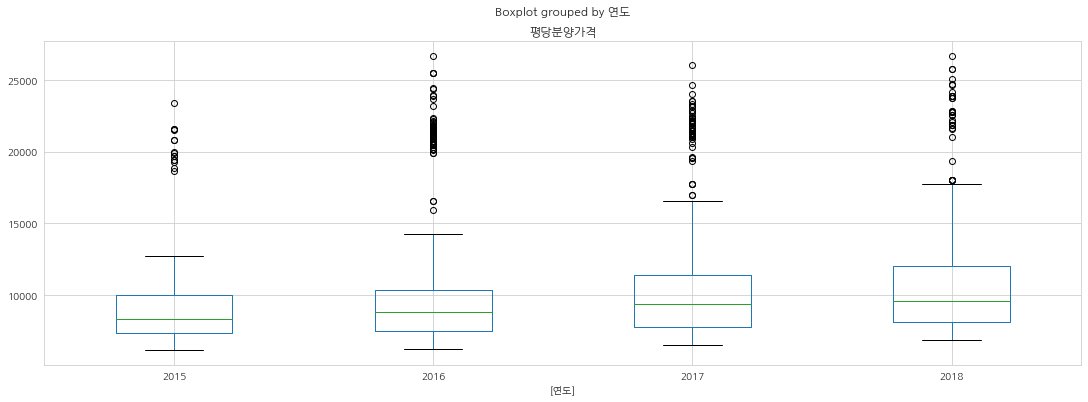

In [63]:
pre_sale[['연도', '지역명', '평당분양가격']].
boxplot(by=['연도'],figsize=(18, 6))

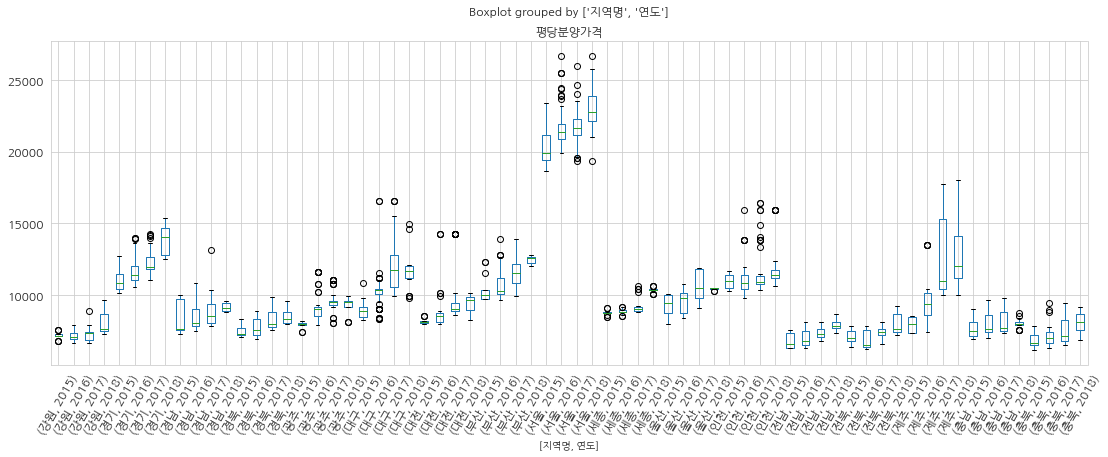

In [64]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6), 
    fontsize=12,
    rot=60)

In [65]:
pre_sale_seoul = pre_sale[pre_sale['지역명']=='서울']

# (ggplot(pre_sale_seoul)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

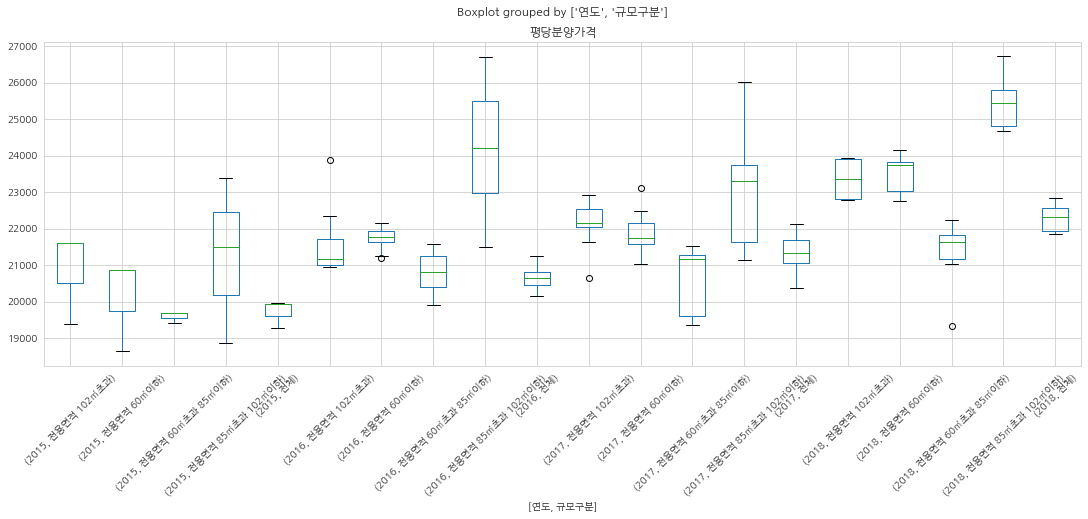

In [66]:
# 이상치를 탐지해 보기에 적합합니다. 2017년 데이터에 평균 가격이 0으로 된 데이터가 있습니다.
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=45)

In [67]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 봅니다.
pre_sale_jeju = pre_sale[pre_sale['지역명']=='제주']
# (ggplot(pre_sale_jeju)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

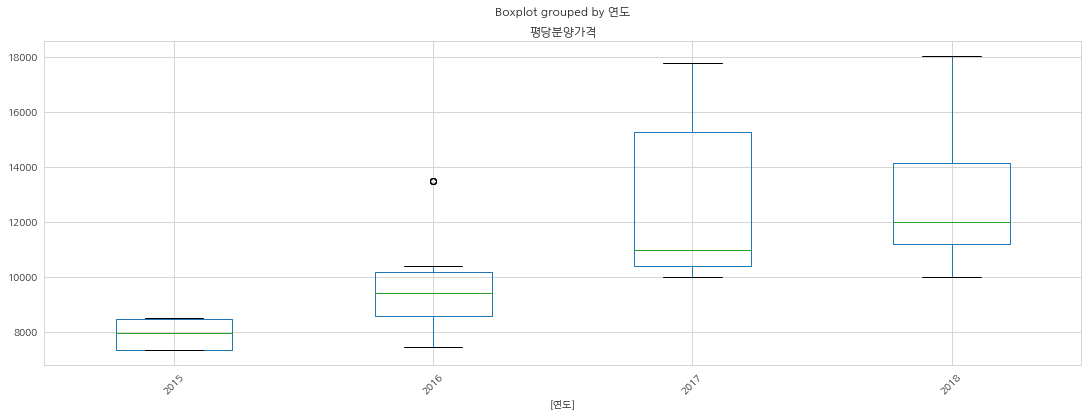

In [68]:
pre_sale_jeju[['연도', '평당분양가격']].boxplot(
    by=['연도'],
    figsize=(18, 6), rot=45)

In [ ]:
pre_sale_jeju[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=45)

In [ ]:
pre_sale_ulsan = pre_sale[pre_sale['지역명']=='울산']
# (ggplot(pre_sale_ulsan)
#  + aes(x='연도', y='평당분양가격', fill='규모구분')
#  + geom_boxplot()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )
pre_sale_ulsan[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6), rot=45)

# Tidy Data 만들기
* [Tidy data - Wikipedia](https://en.wikipedia.org/wiki/Tidy_data)
## 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있습니다다.
* `지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv`을  https://www.data.go.kr/dataset/3035522/fileData.do 에서 다운로드 받거나 다음의 경로에서 다운로드 받습니다. https://goo.gl/oJydAv

In [ ]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0, engine='python')
df.shape

In [ ]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있습니다.
df

In [ ]:
year = df.iloc[0]
month = df.iloc[1]

In [ ]:
# 결측치를 채워줍니다.
year

In [ ]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year)

In [ ]:
df.columns = year

In [ ]:
df = df.drop(df.index[[0,1]])
df

In [ ]:
# 최근 데이터의 컬럼으로 기존 데이터프레임과 합치기 위해 컬럼명을 봅니다.
pre_sale.columns

In [ ]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐줍니다.
# 결측치를 빈문자로 채웁니다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [ ]:
df['지역'] = df['구분'] + df['시군구']

In [ ]:
df['지역']

In [ ]:
melt_columns = df.columns.copy()
melt_columns

In [ ]:
# pre_sale.sample(3)

In [ ]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

In [ ]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

In [ ]:
year_test = ['2013', ' 12월']
year_test[1].strip().replace('월', '')

In [ ]:
# 간단하게 표현하기 위해서 lambda 익명함수로 구현했습니다.
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [ ]:
# 익명함수가 익숙하지 않다면 아래의 방법대로 함수를 직접 구현하셔서 apply로 적용하는 방법도 있습니다.
def get_year(year_month):
    year = year_month.split('년')[0]
    return year

def get_month(year_month):
    month = re.sub('월', '', year_month.split('년')[1]).strip()
    return month

In [ ]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(get_year)
df_2013_2015['월'] = df_2013_2015['기간'].apply(get_month)

In [ ]:
df_2013_2015.head()

## 지역명 강원과 부산 정리

In [ ]:
df_2013_2015['지역'].value_counts()

In [ ]:
# lambda 익명함수를 이용해서 정규표현식으로 문자열을 바꿔주는 방법이 있습니다.
# 하지만 좀 더 간단한 아래의 방법을 사용해 보겠습니다.
# df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
# df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))

# 위와 같이 정규표현식의 기능을 활용할 수도 있으나 좀 더 간단한 replace를 사용합니다.
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산','부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원','강원')

# 그룹화하여 카운트 합니다.
df_2013_2015['지역'].value_counts()

In [ ]:
df_2013_2015.describe()

In [ ]:
df_2013_2015.info()

In [ ]:
# 분양가에 있는 , 를 제거합니다.
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

In [ ]:
# sns.boxplot?

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

In [ ]:
df_2013_2015[df_2013_2015.isnull()].shape

## 이제 2013년부터 2018년 7월까지 데이터를 합칠 준비가 됨

In [ ]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

In [ ]:
df_2013_2015.columns

In [ ]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

In [ ]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [ ]:
df_2015_2018.columns

In [ ]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

In [ ]:
df_2015_2018_prepare.describe()

In [ ]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

In [ ]:
df_2013_2018.head()

In [ ]:
df_2013_2018.tail()

In [ ]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

In [ ]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

In [ ]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

In [ ]:
df_2013_2018.shape

In [ ]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

In [ ]:
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, 
    axis=0, 
    inplace=True)
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, 
    axis=0, 
    inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

In [ ]:
# 판다스로 시각화 할 때는 미리 구하고자 하는 데이터를 요약해 두는 것이 좋습니다.
df_year_mean = df_2013_2018.groupby(['연도'])['평당분양가격'].mean()
df_year_mean

In [ ]:
df_year_mean.plot.bar(rot=0)

In [ ]:
sns.barplot(data=df_2013_2018, x='연도', y='평당분양가격')

In [ ]:
df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

In [ ]:
df_2013_2018[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

In [ ]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
df_2013_2018_jeju[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

In [ ]:
df_2013_2018_jeju["연도"].value_counts()